## Observations and Insights 

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
import csv

# Study data files
mouse_metadata_path = "./matplotlib/Resources/Mouse_metadata.csv"
study_results_path = "./matplotlib/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata= pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [138]:
# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how= "outer")
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [139]:
# Checking the number of mice.
mice= len(data_df["Mouse ID"].value_counts())

mice_df

,Mouse ID
0,249


In [140]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_mouse_ids = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicate_mouse_ids)



['g989']


In [141]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = duplicate_mice_df.loc[duplicate_mice_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()



In [142]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = data_df[data_df["Mouse ID"] != "g989"]


In [143]:
# Checking the number of mice in the clean DataFrame.
clean= len(clean_mice_df["Mouse ID"].unique())
clean_df= pd.DataFrame({"Mouse ID": [clean]})
clean_df




,Mouse ID
0,248


## Summary Statistics

In [144]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_df= clean_mice_df.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_grouped_df.head()


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [178]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_grouped_df.agg


<bound method DataFrame.aggregate of                    Mean     Median  Standard Deviation       SEM
Drug Regimen                                                    
Capomulin     40.675741  41.557809            4.994774  0.329346
Ceftamin      52.591172  51.776157            6.268188  0.469821
Infubinol     52.884795  51.820584            6.567243  0.492236
Ketapril      55.235638  53.698743            8.279709  0.603860
Naftisol      54.331565  52.509285            8.134708  0.596466
Placebo       54.033581  52.288934            7.821003  0.581331
Propriva      52.320930  50.446266            6.622085  0.544332
Ramicane      40.216745  40.673236            4.846308  0.320955
Stelasyn      54.233149  52.431737            7.710419  0.573111
Zoniferol     53.236507  51.818479            6.966589  0.516398>

## Bar and Pie Charts

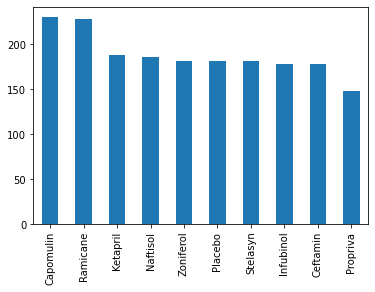

In [155]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = clean_mice_df['Drug Regimen'].value_counts().plot.bar(width=0.5, zorder=3)


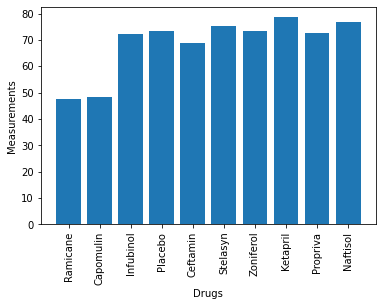

In [176]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_values = clean_mice_df['Drug Regimen']
y_values = clean_mice_df['Tumor Volume (mm3)']
plt.bar(x_values,y_values)
plt.xticks(rotation=90)
plt.xlabel('Drugs')
plt.ylabel('Measurements')
plt.show()


Text(0, 0.5, '')

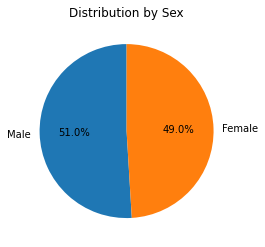

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data = clean_mice_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

# Hide the 'y' label
pie_plot.set_ylabel('')


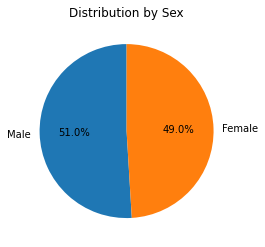

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Identify distribution of data by sex
data = clean_mice_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [183]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#max_tp_df = pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df = pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(data_df, max_tp_df, on='Mouse ID')
merged_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [184]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

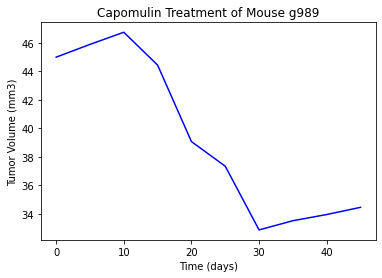

In [192]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
groupby_drug_df = clean_mice_df.groupby(["Drug Regimen"])
groupby_drug_df.head()

capomulin_df = groupby_drug_df.get_group("Capomulin")
capomulin_df



mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 't565']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], color="b")

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse g989")

# Display plot
plt.show()

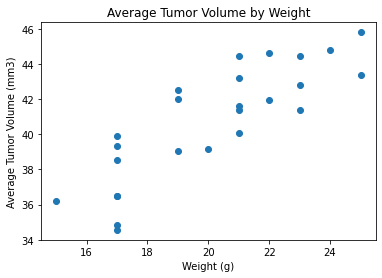

In [193]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Isolate cases that only use the Capomulin regimen
capomulin_df = clean_mice_df.loc[data_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

In [166]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# for mouse weight and average tumor volume for the Capomulin regimen


NameError: name 'x' is not defined